In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# BHZ model analysis

## Periodic case

### Definitions

In [205]:
sx=np.array([[0,1],[1,0]],dtype=complex)
sy=np.array([[0,-1j],[1j,0]],dtype=complex)
sz=np.array([[1,0],[0,-1]],dtype=complex)
s0=np.eye(2,dtype=complex)

In [206]:
def mat(x,y,m):
    return np.sin(x)*sx+np.sin(y)*sy+(m+np.cos(x)+np.cos(y))*sz

In [207]:
def path(L):
    k=[]
    for i in np.linspace(0,np.pi,L,endpoint=False):
        k.append([i,0])
    for i in np.linspace(0,np.pi,L,endpoint=False):
        k.append([np.pi,i])
    for i in np.linspace(0,np.pi,int(np.sqrt(2)*L)):
        k.append([np.pi-i,np.pi-i])
    return np.array(k)

### Orbital polarization

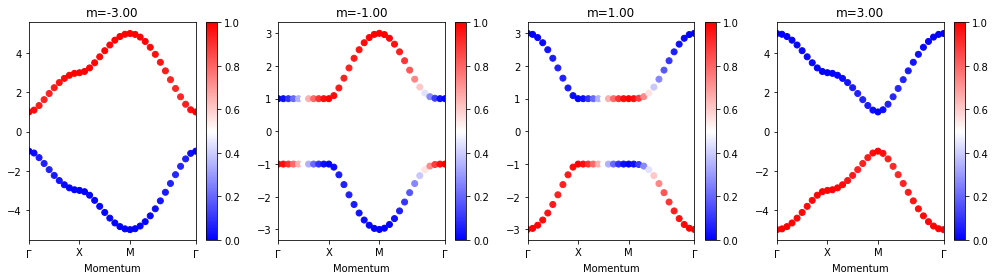

In [304]:
plt.figure(figsize=(14,4))
for i in range(1,5):
    
    e=[]
    w=[]
    L=10
    for k in path(L):
        vals,vecs=np.linalg.eigh(mat(k[0],k[1],-5+2*i))
        e.append(vals)
        w.append(abs(vecs[1,:])**2)
    e=np.array(e)
    w=np.array(w)
    
    plt.subplot("14%d"%i)
    plt.title("m=%.2f"%(-5+2*i))
    plt.scatter(np.arange(len(e[:,0])),e[:,0],c=w[:,0],vmin=0,vmax=1,cmap=plt.cm.bwr)
    plt.scatter(np.arange(len(e[:,0])),e[:,1],c=w[:,1],vmin=0,vmax=1,cmap=plt.cm.bwr)
    plt.xlabel("Momentum")
    plt.xticks([0,L,2*L,2*L+int(np.sqrt(2)*L)-1],["$\Gamma$","X","M","$\Gamma$"])
    plt.xlim(0,2*L+int(np.sqrt(2)*L)-1)
    plt.colorbar()
plt.tight_layout()

### Gap closings

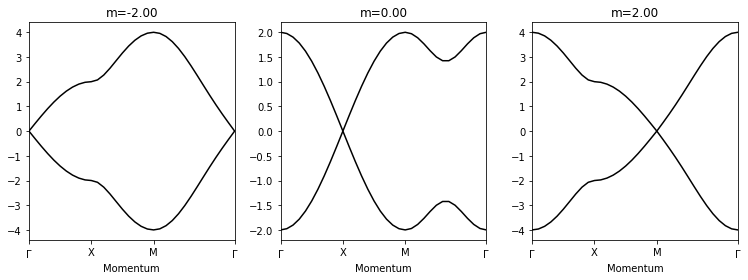

In [305]:
plt.figure(figsize=(10.5,4))
for i in range(1,4):
    
    e=[]
    L=10
    for k in path(L):
        vals=np.linalg.eigvalsh(mat(k[0],k[1],-4+2*i))
        e.append(vals)
    e=np.array(e)
    
    plt.subplot("13%d"%i)
    plt.title("m=%.2f"%(-4+2*i))
    plt.plot(np.arange(len(e[:,0])),e[:,0],c='k')
    plt.plot(np.arange(len(e[:,0])),e[:,1],c='k')
    plt.xlabel("Momentum")
    plt.xticks([0,L,2*L,2*L+int(np.sqrt(2)*L)-1],["$\Gamma$","X","M","$\Gamma$"])
    plt.xlim(0,2*L+int(np.sqrt(2)*L)-1)
plt.tight_layout()

## Cylinder geometry

In [296]:
def matCyl(y,m,L,periodic=False):
    hopj =0.5j*np.diag(np.ones(L-1),1)
    hopj+=np.conj(hopj.T)
    hop =0.5*np.diag(np.ones(L-1),1)
    hop+=hop.T
    if periodic:
        hop[-1,0]=hop[0,1]
        hopj[-1,0]=hopj[0,1]
    eye=np.eye(L)
    return np.kron(hopj,sx)+np.kron(eye,np.sin(y)*sy)+np.kron((m+np.cos(y))*eye+hop,sz)

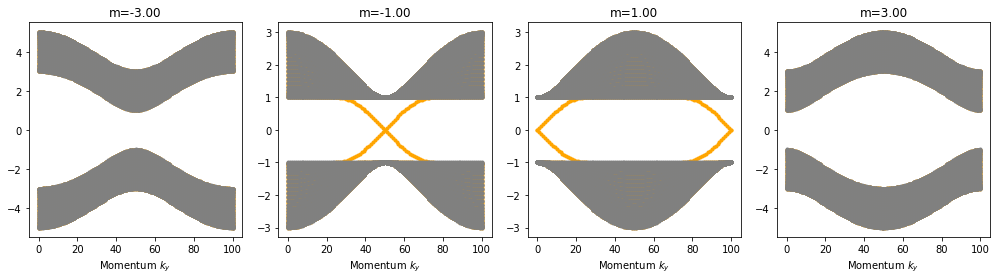

In [306]:
plt.figure(figsize=(14,4))
for i in range(1,5):
    
    e=[]
    for y in np.linspace(-np.pi,np.pi,101):
        e.append(np.linalg.eigvalsh(matCyl(y,-5+2*i,50,periodic=True)))
    e=np.array(e)
    eo=[]
    for y in np.linspace(-np.pi,np.pi,101):
        eo.append(np.linalg.eigvalsh(matCyl(y,-5+2*i,50,periodic=False)))
    eo=np.array(eo)

    plt.subplot("14%d"%i)
    plt.title("m=%.2f"%(-5+2*i))
    plt.plot(eo,'.',color='orange')
    plt.plot(e,'.',color='gray')
    plt.xlabel("Momentum $k_y$")
    
plt.tight_layout()